In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns


from IPython.display import display
pd.set_option('display.max_columns', None)


In [15]:
CSV_metrics_folder = "metric_logs/"
FIG_FOLDER = "./analysis/"

In [48]:
def preprocess_text_wmt14(examples):
    inputs = [ex["en"] for ex in examples["translation"]]
    targets = [ex["fr"] for ex in examples["translation"]]
    text_df = pd.DataFrame({'en':inputs, 'fr':targets})
    return text_df

def preprocess_text_flores200(dataset_src, dataset_tgt):    
    inputs = dataset_flores200_eng['sentence']
    targets = dataset_flores200_fra['sentence']
    text_df = pd.DataFrame({'en':inputs, 'fr':targets})
    return text_df


def num_of_words_in_lang_dataset(df, lang_code):
    df['word_count' + "_" + lang_code] = df[lang_code].apply(lambda x : len(str(x).split(" ")))
    return df


def describe_dataset_df(text_df, dataset_name, save_filename, x_axis="Sequence Length", cumulative=False, save=False):
    text_df = num_of_words_in_lang_dataset(text_df, 'en')
    text_df = num_of_words_in_lang_dataset(text_df, 'fr')
    
    plt.subplot(1, 2, 1)

    display(text_df.head(10))
    display(text_df.describe())

    plt.hist(text_df["word_count_en"], bins=100, cumulative = cumulative,label = 'en')

    
    plt.axvline(x=15, color="red")
    plt.axvline(x=30, color="red")
    plt.axvline(x=82, color="red")
    plt.title(dataset_name + " Text Length Distribution")
    plt.xlabel(x_axis)
    plt.ylabel("Frequency")
    plt.legend(loc="upper right")
    # plt.show()

    plt.subplot(1, 2, 2)

    plt.hist(text_df["word_count_fr"], bins=100, color="orange", cumulative = cumulative ,label = 'fr')
    plt.title(dataset_name)

    plt.axvline(x=15, color="red")
    plt.axvline(x=30, color="red")
    plt.axvline(x=82, color="red")
    plt.title(dataset_name + " Text Length Distribution")
    plt.legend(loc="upper right")
    plt.xlabel(x_axis)
    plt.ylabel("Frequency")
    plt.tight_layout()

    plt.show()
    if save:
        plt.savefig(save_filename,
        dpi=300,
        bbox_inches="tight")
    return text_df
   
       

In [49]:
# Analyse WMT14  dataset
all_dataset_wmt14 = load_dataset("wmt14", "fr-en", split="validation")
all_dataset_wmt14

filtered_dataset= all_dataset_wmt14.filter(lambda example: print(len((example["translation"]["en"]).split(" "))))
filtered_dataset

Found cached dataset wmt14 (/home/wassim/.cache/huggingface/datasets/wmt14/fr-en/1.0.0/2de185b074515e97618524d69f5e27ee7545dcbed4aa9bc1a4235710ffca33f4)
Loading cached processed dataset at /home/wassim/.cache/huggingface/datasets/wmt14/fr-en/1.0.0/2de185b074515e97618524d69f5e27ee7545dcbed4aa9bc1a4235710ffca33f4/cache-ffa021a3c9d40584.arrow


Dataset({
    features: ['translation'],
    num_rows: 0
})

,en,fr,word_count_en,word_count_fr
0,A Republican strategy to counter the re-electi...,Une stratégie républicaine pour contrer la réé...,9,8
1,Republican leaders justified their policy by t...,Les dirigeants républicains justifièrent leur ...,12,15
2,"However, the Brennan Centre considers this a m...","Or, le Centre Brennan considère cette dernière...",26,29
3,"Indeed, Republican lawyers identified only 300...","D'ailleurs, les avocats républicains n'ont rec...",17,17
4,One thing is certain: these new provisions wil...,Une chose est certaine: ces nouvelles disposit...,15,13
5,"In this sense, the measures will partially und...","En ce sens, ces mesures mineront en partie le ...",12,12
6,"Unlike in Canada, the American States are resp...","Contrairement au Canada, les États américains ...",18,15
7,It is in this spirit that a majority of Americ...,C'est dans cet esprit qu'une majorité de gouve...,25,26
8,This phenomenon gained momentum following the ...,Ce phénomène a pris de l'ampleur après les éle...,19,22
9,"As a result, 180 bills restricting the exercis...","En conséquence, 180 projets de lois restreigna...",21,23


,word_count_en,word_count_fr
count,3000.000000,3000.000000
mean,18.696000,20.517000
std,10.998268,12.309842
min,1.000000,1.000000
25%,11.000000,12.000000
50%,17.000000,18.000000
75%,24.000000,27.000000
max,82.000000,100.000000


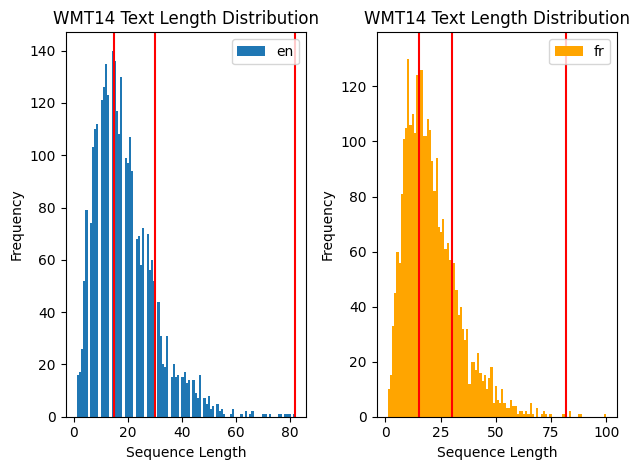

A Republican strategy to counter the re-election of Obama


<Figure size 640x480 with 0 Axes>

In [50]:
wmt14_df = preprocess_text_wmt14(all_dataset_wmt14)
describe_dataset_df(wmt14_df, dataset_name="WMT14", save_filename="wmt14_dataset_word_count.png", cumulative=False, save=True)
# describe_dataset_df(wmt14_df, dataset_name="WMT14", cumulative=True)


print(all_dataset_wmt14[0]["translation"]["en"])



1. *** Talk about the best-performing configuration.
    1.1. Use the best-performing configuration on the Dense models for MoE model that you ran.
2.  Extra time: Show latency and throughput of largest sentence vs Latency and throughput of smallest sentence for each model and dataset (Need to run the experiments, but shouldn't take much time to setup.)
3. *** Talk about the beam size. 
4. *** Describe how when you first ran the experiments, you got better results with lower max generation. then, since you were curious as to why that is, you researched to see  if padding makes any difference. That is why we chose to run experiments with padding and no padding
    5. What we found out is there is no difference in the scores between padding and no padding. 
6. Talk about latency and throughput. Investigate how they change with batch size, beam size, how they change with different models. See which one is the most efficient. Explain why they are efficient.
7. Some additional analysis: Explain how rerunning ... (?)
8. 
9. Spend time generating nice figures
10. Show latency and throughout with and without using archer. Show memory utilisation with and without using archer.
11. **** Show latency of MoE vs without MoE, comparing parameter size.
12. Run beam size of 1,2,4,8 for three experiments.
13. **** Run NLLB-MoE for 1 infernence.
14. **** Report different settings of device_memory_ratio of the switch transformer trained.
15. Analyse the quality metrics that you see

## 

Found cached dataset flores (/home/wassim/.cache/huggingface/datasets/facebook___flores/fra_Latn/1.0.0/2a1174c8c4991ca09a9cb5b9a367cb2e049b073852cb4097456164d4612391ef)
Found cached dataset flores (/home/wassim/.cache/huggingface/datasets/facebook___flores/eng_Latn/1.0.0/2a1174c8c4991ca09a9cb5b9a367cb2e049b073852cb4097456164d4612391ef)


,en,fr,word_count_en,word_count_fr
0,"On Monday, scientists from the Stanford Univer...",Des scientifiques de l’école de médecine de l’...,43,59
1,Lead researchers say this may bring early dete...,"Selon les chercheurs principaux, cela pourrait...",36,53
2,The JAS 39C Gripen crashed onto a runway at ar...,Le JAS 39C Gripen s’est écrasé sur une piste a...,24,26
3,The pilot was identified as Squadron Leader Di...,Le pilote a été identifié comme étant le chef ...,9,12
4,Local media reports an airport fire vehicle ro...,La presse locale a rapporté qu'un véhicule de ...,11,20
5,28-year-old Vidal had joined Barça three seaso...,"Vidal, 28 ans, avait rejoint le Barça il y a t...",10,16
6,"Since moving to the Catalan-capital, Vidal had...","Depuis son arrivée dans la capitale catalane, ...",13,15
7,The protest started around 11:00 local time (U...,La manifestation a commencé vers 11 h heure lo...,22,29
8,"Just after 11:00, protesters blocked traffic o...","À Whitehall, peu après 11 h 00, des manifestan...",12,19
9,"At 11:20, the police asked the protesters to m...","À 11 h 20, la police a demandé aux manifestant...",29,29


,word_count_en,word_count_fr
count,997.000000,997.000000
mean,21.018054,23.960883
std,6.844051,8.086845
min,6.000000,5.000000
25%,16.000000,18.000000
50%,20.000000,23.000000
75%,25.000000,29.000000
max,48.000000,59.000000


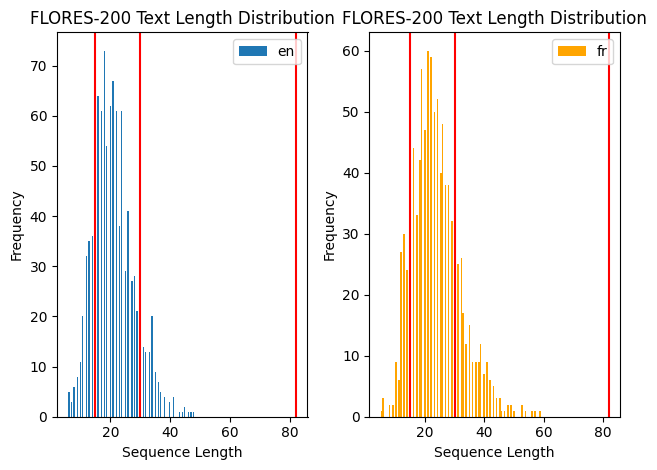

,en,fr,word_count_en,word_count_fr
0,"On Monday, scientists from the Stanford Univer...",Des scientifiques de l’école de médecine de l’...,43,59
1,Lead researchers say this may bring early dete...,"Selon les chercheurs principaux, cela pourrait...",36,53
2,The JAS 39C Gripen crashed onto a runway at ar...,Le JAS 39C Gripen s’est écrasé sur une piste a...,24,26
3,The pilot was identified as Squadron Leader Di...,Le pilote a été identifié comme étant le chef ...,9,12
4,Local media reports an airport fire vehicle ro...,La presse locale a rapporté qu'un véhicule de ...,11,20
...,...,...,...,...
992,The tourist season for the hill stations gener...,La saison touristique des stations de montagne...,13,12
993,"However, they have a different kind of beauty ...","Cependant, leur beauté et leur charme évoluent...",29,32
994,Only a few airlines still offer bereavement fa...,Seules quelques compagnies aériennes proposent...,17,21
995,"Airlines that offer these include Air Canada, ...",Les compagnies aériennes qui les proposent son...,21,26


<Figure size 640x480 with 0 Axes>

In [177]:
dataset_flores200_fra = load_dataset("facebook/flores", "fra_Latn", split="dev")
dataset_flores200_eng = load_dataset("facebook/flores", "eng_Latn", split="dev")

flores200_df = preprocess_text_flores200(dataset_flores200_eng, dataset_flores200_fra)
describe_dataset_df(flores200_df, dataset_name="FLORES-200", save_filename="flores_dataset_word_count.png" , cumulative=False, save=True)
# describe_dataset_df(flores200_df, dataset_name="FLORES-200", cumulative=True)


# plt.savefig(save_filename,
#     dpi=300,
#     bbox_inches="tight")

In [52]:
from transformers import AutoTokenizer

def ecdf_plot_two_datasets(dataset_df1, dataset_df2, label_1, label_2, x_axis, title, max_length=256, trunctuation=True, to_pad="do_not_pad", scale=None, save=False, save_filename=None):
    tokenizer = AutoTokenizer.from_pretrained("google/switch-base-128")
    def tokenize(dataset_df):
        
        all_inputs = (list(dataset_df["en"].values))
        all_inputs = [
            tokenizer(input, truncation=trunctuation, padding=to_pad,
                      max_length=max_length).input_ids for input in all_inputs
        ]
        lengths = [len(input) for input in all_inputs]

        return lengths

    lengths_1 = tokenize(dataset_df1)
    lengths_2 = tokenize(dataset_df2)
    plt.figure()
    sns.ecdfplot(lengths_1, label=label_1)
    sns.ecdfplot(lengths_2, label= label_2)

    plt.xlabel(x_axis)
    plt.title(title)
    plt.legend()
    if scale == "log":
        plt.xscale("log")
    if save:
        plt.savefig(save_filename,
            dpi=300,
            bbox_inches="tight")

ECDF Plot of all inputs, french and english. Exploring differences in the length of news text between true & fake news

The ecdf Plot has the same trend for word count of french only, and english only.

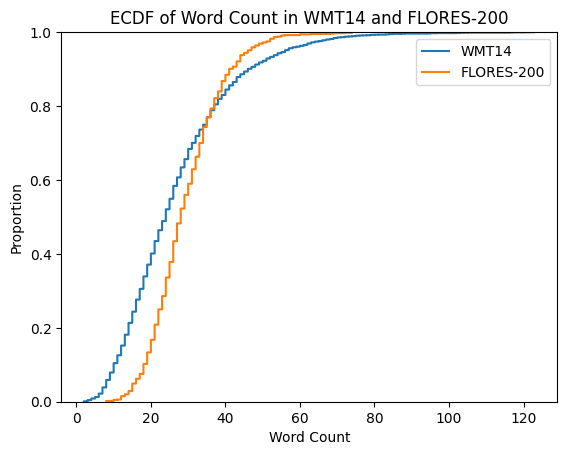

In [53]:
ecdf_plot_two_datasets(wmt14_df, flores200_df, save=True, save_filename=FIG_FOLDER + "ecdf_word_count_wmt14_flores.png", label_1="WMT14", label_2="FLORES-200" , x_axis= "Word Count", title="ECDF of Word Count in WMT14 and FLORES-200")


# print(type(all_inputs[0]))

# # get token ids from all_inputs type tokenizers.Encoding
# all_inputs = all_inputs[-1].ids



In [24]:
!ls ~/Benchmark/metric_logs

nllb-200-distilled-600M_flores200_metrics.csv  t5-base_wmt14_metrics.csv
nllb-200-distilled-600M_wmt14_metrics.csv      t5-large_flores200_metrics.csv
t5-base_flores200_metrics.csv		       t5-large_wmt14_metrics.csv


In [54]:
def ecdf_plot_metric(metric_df, metric_name, title, scale=None, save=False, save_filename=None):
    
    plt.figure()
    sns.ecdfplot(dataset_df[metric_name], label=metric_name)
    

    plt.xlabel(metric_name)
    plt.title(title)
    if scale == "log":
        plt.xscale("log")
    if save:
        plt.savefig(save_filename,
            dpi=300,
            bbox_inches="tight")

In [176]:
# Analyse the experiments!
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(CSV_metrics_folder + "nllb-200-distilled-600M_wmt14_metrics.csv")
data = data.sort_values(by=['sacrebleu'], ascending=False)
data

,model_name,total_params,use_archer,device_memory_ratio,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput
72,facebook/nllb-200-distilled-600M,615073792,False,NaN,wmt14,1,1,en,fr,32,1,64,10,pad_to_max_length,100.000000,100.000000,100.000000,100.000000,0.999023,20.00000,0.008186,0.006386,1.832355e+03,3.131951e+03
99,facebook/nllb-200-distilled-600M,615073792,False,NaN,wmt14,1,1,en,fr,32,1,128,30,pad_to_max_length,100.000000,100.000000,100.000000,100.000000,0.999023,20.00000,0.007709,0.005819,1.945861e+03,3.436785e+03
93,facebook/nllb-200-distilled-600M,615073792,False,NaN,wmt14,1,1,en,fr,32,1,512,10,do_not_pad,100.000000,100.000000,100.000000,100.000000,0.999023,20.00000,0.008526,0.005862,1.759380e+03,3.411947e+03
94,facebook/nllb-200-distilled-600M,615073792,False,NaN,wmt14,1,1,en,fr,32,2,512,10,do_not_pad,100.000000,100.000000,100.000000,100.000000,0.999023,20.00000,0.009160,0.005976,1.637562e+03,3.346714e+03
95,facebook/nllb-200-distilled-600M,615073792,False,NaN,wmt14,1,1,en,fr,32,4,512,10,do_not_pad,100.000000,100.000000,100.000000,100.000000,0.999023,20.00000,0.007930,0.006012,1.891546e+03,3.326832e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,facebook/nllb-200-distilled-600M,615073792,False,NaN,wmt14,3000,710,en,fr,32,1,512,10,pad_to_max_length,31.508888,35.955283,55.634936,53.471797,0.561438,15.86338,0.005017,0.005916,1.733910e+06,1.903876e+06
12,facebook/nllb-200-distilled-600M,615073792,False,NaN,wmt14,3000,710,en,fr,32,1,64,10,do_not_pad,31.508888,35.955283,55.634936,53.471797,0.561438,15.86338,0.005123,0.006068,1.698039e+06,1.856049e+06
15,facebook/nllb-200-distilled-600M,615073792,False,NaN,wmt14,3000,710,en,fr,32,1,128,10,do_not_pad,31.508888,35.955283,55.634936,53.471797,0.561438,15.86338,0.005023,0.006047,1.731869e+06,1.862613e+06
18,facebook/nllb-200-distilled-600M,615073792,False,NaN,wmt14,3000,710,en,fr,32,1,256,10,do_not_pad,31.508888,35.955283,55.634936,53.471797,0.561438,15.86338,0.005312,0.006052,1.637695e+06,1.860935e+06


In [181]:
import os
# Merge all metrics to one table
csv_files = os.listdir( CSV_metrics_folder )

files_df_dict = {}
# This would print all the files and directories
for file in csv_files:
    if "metric" in file: 
        data= pd.read_csv(CSV_metrics_folder + file)
        files_df_dict[file] = data

df_merge_all = pd.concat(files_df_dict.values(), ignore_index=True)
df_merge_all = df_merge_all.fillna(False)
df_merge_all = df_merge_all[df_merge_all["beam_size"] <=32]
df_merge_all = df_merge_all.drop_duplicates()
df_merge_all

,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
0,google/switch_16_finetuned,630,True,flores200,1,1,en,fr,32,1,20,-1,no_pad_fill,0.153957,0.057383,13.904675,13.002759,0.072115,19.000000,4.617972,0.179913,1.299272e+01,1.056067e+02,False
1,google/switch_16_finetuned,630,True,flores200,1,1,en,fr,32,2,20,-1,no_pad_fill,0.116982,0.078797,15.141226,12.993410,0.048077,19.000000,0.076106,0.048656,7.883693e+02,3.904955e+02,False
2,google/switch_16_finetuned,630,True,flores200,1,1,en,fr,32,4,20,-1,no_pad_fill,0.144581,0.089809,18.472260,15.964222,0.064103,19.000000,0.068468,0.047508,8.763164e+02,3.999328e+02,False
3,google/switch_16_finetuned,630,True,flores200,1,1,en,fr,32,8,20,-1,no_pad_fill,0.144581,0.089809,18.472260,15.964222,0.064103,19.000000,0.072908,0.041661,8.229514e+02,4.560648e+02,False
4,google/switch_16_finetuned,630,True,flores200,1,1,en,fr,32,1,32,-1,no_pad_fill,0.705569,0.415819,20.831155,18.814175,0.103011,31.000000,0.074672,0.025436,8.035136e+02,1.218762e+03,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,1,128,-1,pad_to_max_length,45.001627,48.779117,67.568570,65.590515,0.681717,38.966901,0.005550,0.006033,5.567318e+06,6.439312e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5.585562e+06,6.722573e+06,False
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3.324243e+06,6.707889e+06,False
401,google/switch_16_finetuned,630,True,wmt14,1,1,en,fr,32,1,32,-1,no_pad_fill,9.980099,15.733206,66.321237,57.459280,0.384909,13.000000,3.449954,0.212142,5.507320e+00,6.127983e+01,0.3


In [182]:
df_merge_wmt14 = df_merge_all[df_merge_all["dataset_name"] == "wmt14"]
df_merge_flores200 = df_merge_all[df_merge_all["dataset_name"] == "flores200"]

df_merge_wmt14 = df_merge_wmt14.sort_values(by=['sacrebleu'], ascending=False)
df_merge_flores200 = df_merge_flores200.sort_values(by=['sacrebleu'], ascending=False)


In [183]:
display(df_merge_wmt14)
df_merge_wmt14.describe()


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
278,facebook/nllb-200-distilled-600M,615073792,False,wmt14,1,1,en,fr,32,1,128,-1,do_not_pad,100.0,100.0,100.000000,100.000000,0.999023,20.0,0.008538,0.005741,1756.876100,3483.723467,False
119,t5-base,222903552,False,wmt14,1,1,en,fr,32,2,128,30,pad_to_max_length,100.0,100.0,100.000000,100.000000,0.999023,19.0,0.008673,0.006889,2190.631000,2757.879805,False
241,facebook/nllb-200-distilled-600M,615073792,False,wmt14,1,1,en,fr,32,4,64,30,pad_to_max_length,100.0,100.0,100.000000,100.000000,0.999023,20.0,0.009221,0.006064,1626.668800,3298.108944,False
242,facebook/nllb-200-distilled-600M,615073792,False,wmt14,1,1,en,fr,32,1,128,30,pad_to_max_length,100.0,100.0,100.000000,100.000000,0.999023,20.0,0.007709,0.005819,1945.860800,3436.784773,False
243,facebook/nllb-200-distilled-600M,615073792,False,wmt14,1,1,en,fr,32,2,128,30,pad_to_max_length,100.0,100.0,100.000000,100.000000,0.999023,20.0,0.009328,0.005997,1608.037500,3334.724951,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,facebook/nllb-moe-54b,524717009,False,wmt14,1,1,en,fr,1,4,64,-1,no_pad_fill,0.0,0.0,11.262631,8.446974,0.000000,64.0,1.231458,0.456350,17.052952,140.243105,False
63,facebook/nllb-moe-54b,524717009,False,wmt14,1,1,en,fr,1,1,128,-1,no_pad_fill,0.0,0.0,7.124413,5.343310,0.000000,128.0,1.172449,0.114301,17.911232,1119.852697,False
64,facebook/nllb-moe-54b,524717009,False,wmt14,1,1,en,fr,1,2,128,-1,no_pad_fill,0.0,0.0,8.011914,6.008936,0.000000,128.0,1.234269,0.178055,17.014116,718.878269,False
65,facebook/nllb-moe-54b,524717009,False,wmt14,1,1,en,fr,1,4,128,-1,no_pad_fill,0.0,0.0,7.739168,5.804376,0.000000,128.0,1.221783,0.343588,17.187994,372.539494,False


,total_params,dataset_size,dataset_size_after_filter_wrt_input_len,batch_size,beam_size,max_gen_length,max_input_seq_length,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput
count,2.500000e+02,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02,2.500000e+02
mean,5.367508e+08,1404.532000,997.780000,29.936000,2.352000,185.456000,11.840000,58.500480,60.721342,72.149945,70.703641,0.706067,25.969429,1.382002,0.073854,3.628281e+06,4.402772e+06
std,1.999482e+08,1499.427733,1248.606203,7.268509,1.561361,147.093474,12.777616,37.426355,35.847395,27.436295,28.541123,0.298133,15.603741,8.084749,0.334263,5.163166e+06,6.477941e+06
min,6.300000e+02,1.000000,1.000000,1.000000,1.000000,20.000000,-1.000000,0.000000,0.000000,1.534227,1.973425,0.000000,9.000000,0.004719,0.005399,3.320994e-01,8.043121e+00
25%,5.247170e+08,1.000000,1.000000,32.000000,1.000000,128.000000,-1.000000,32.159736,36.904009,56.899681,54.724418,0.571822,19.000000,0.005896,0.005877,1.686015e+03,3.180160e+03
50%,6.150738e+08,1.000000,1.000000,32.000000,2.000000,128.000000,10.000000,34.377133,38.688755,59.102346,56.915936,0.590861,20.000000,0.008285,0.006057,2.290409e+03,3.518320e+03
75%,6.150738e+08,3000.000000,2627.000000,32.000000,4.000000,256.000000,30.000000,100.000000,100.000000,100.000000,100.000000,0.999023,30.620860,0.010920,0.013147,7.758718e+06,7.752217e+06
max,7.376681e+08,3000.000000,3000.000000,32.000000,16.000000,512.000000,30.000000,100.000000,100.000000,100.000000,100.000000,0.999023,128.000000,63.234093,3.492991,1.561146e+07,1.882075e+07


In [184]:
df_merge_flores200

,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
334,t5-base,222903552,False,flores200,997,199,en,fr,32,4,128,15,pad_to_max_length,47.277472,51.984123,68.478459,66.844419,0.687672,28.793970,0.006225,0.007850,7.511659e+05,7.299693e+05,False
337,t5-base,222903552,False,flores200,997,199,en,fr,32,4,128,15,do_not_pad,47.277472,51.984123,68.478459,66.844419,0.687672,28.793970,0.006009,0.007937,7.781424e+05,7.219797e+05,False
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3.324243e+06,6.707889e+06,False
394,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,898,en,fr,32,4,512,30,do_not_pad,47.106364,51.248931,69.350990,67.380539,0.701068,37.630290,0.006261,0.005901,4.167423e+06,5.726501e+06,False
391,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,898,en,fr,32,4,256,30,do_not_pad,47.106364,51.248931,69.350990,67.380539,0.701068,37.630290,0.006339,0.005940,4.116072e+06,5.688672e+06,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,facebook/nllb-moe-54b,524717009,False,flores200,1,1,en,fr,1,2,20,-1,no_pad_fill,0.000000,0.000000,3.485732,2.614299,0.000000,20.000000,121.689399,3.303176,5.259291e-01,6.054779e+00,False
40,facebook/nllb-moe-54b,524717009,False,flores200,1,1,en,fr,1,1,20,-1,no_pad_fill,0.000000,0.000000,4.239735,3.179801,0.000000,20.000000,122.379833,2.479284,5.229620e-01,8.066845e+00,False
53,facebook/nllb-moe-54b,524717009,False,flores200,1,1,en,fr,32,8,32,-1,no_pad_fill,0.000000,0.329121,7.008761,5.256571,0.000000,32.000000,2.590597,2.036739,2.470473e+01,1.571139e+01,False
67,google/switch-base-128,3318,False,flores200,997,997,en,fr,16,4,128,-1,pad_to_max_length,0.000000,0.012786,1.602607,1.972509,0.022311,127.000000,0.021394,0.020789,1.599261e+06,6.090632e+06,False


## Size after filtering out by input sequence length


In [65]:
def dataset_size_after_filtering_sequence_length(df, seq_len_col="max_input_seq_length"):
    df_multiple_experiments = df[df["dataset_size"] != 1]
    dataset_size = 0
    dataset_size = df_multiple_experiments["dataset_size"].max()
    
    seq_lens = []
    dataset_sizes_after_filterss = []
    for seq_len in df_multiple_experiments[seq_len_col].drop_duplicates().values:
        
        seq_lens.append(seq_len)
        dataset_size_after_filter = (df_multiple_experiments[df_multiple_experiments[seq_len_col] == seq_len]["dataset_size_after_filter_wrt_input_len"]).drop_duplicates().values
        dataset_sizes_after_filterss.append(list(dataset_size_after_filter)[0])
        
    print(dataset_size)
    print(seq_lens)
    print(dataset_sizes_after_filterss)

    plt.bar(seq_lens, dataset_sizes_after_filterss)
    plt.show()
def plot_bar():
    pass

997
[15, -1, 30]
[199, 997, 898]


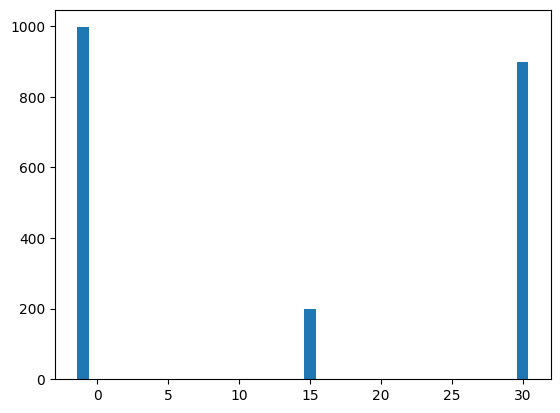

3000
[-1, 30, 15]
[3000, 2627, 1370]


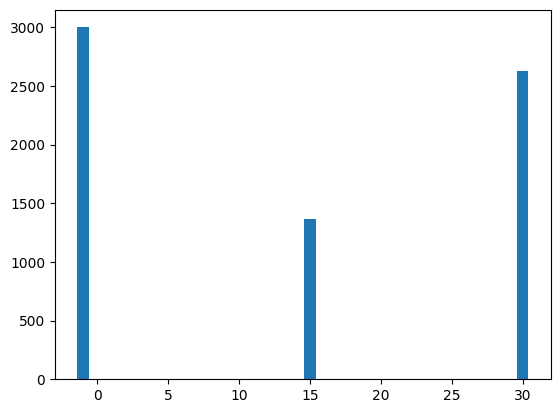

In [66]:
dataset_size_after_filtering_sequence_length(df_merge_flores200)
dataset_size_after_filtering_sequence_length(df_merge_wmt14)


## Separate single and multiple sentence input


In [185]:
df_merge_flores200_multiple_sentences = df_merge_flores200[df_merge_flores200["dataset_size"] != 1]

display(df_merge_flores200_multiple_sentences)

,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
334,t5-base,222903552,False,flores200,997,199,en,fr,32,4,128,15,pad_to_max_length,47.277472,51.984123,68.478459,66.844419,0.687672,28.793970,0.006225,0.007850,751165.94,7.299693e+05,False
337,t5-base,222903552,False,flores200,997,199,en,fr,32,4,128,15,do_not_pad,47.277472,51.984123,68.478459,66.844419,0.687672,28.793970,0.006009,0.007937,778142.40,7.219797e+05,False
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.80,6.707889e+06,False
394,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,898,en,fr,32,4,512,30,do_not_pad,47.106364,51.248931,69.350990,67.380539,0.701068,37.630290,0.006261,0.005901,4167423.00,5.726501e+06,False
391,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,898,en,fr,32,4,256,30,do_not_pad,47.106364,51.248931,69.350990,67.380539,0.701068,37.630290,0.006339,0.005940,4116072.20,5.688672e+06,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,8,20,-1,no_pad_fill,3.727416,4.140567,21.981960,20.338351,0.188173,18.925777,0.081684,0.068741,418870.47,2.744948e+05,False
22,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,4,20,-1,no_pad_fill,3.710803,4.047679,21.907989,20.252489,0.189291,18.919759,0.081869,0.065574,417924.03,2.876610e+05,False
21,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,2,20,-1,no_pad_fill,3.456800,3.740707,21.401225,19.750222,0.182839,18.903711,0.083666,0.061506,408945.38,3.064238e+05,False
20,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,20,-1,no_pad_fill,2.838825,3.128928,20.046494,18.418087,0.168386,18.921765,0.089382,0.057497,382797.22,3.281023e+05,False


In [186]:
df_merge_flores200_single_sentences = df_merge_flores200[df_merge_flores200["dataset_size"] == 1]
display(df_merge_flores200_single_sentences)

,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
323,t5-base,222903552,False,flores200,1,1,en,fr,32,1,128,-1,do_not_pad,14.534554,20.439332,55.127485,50.386315,0.443005,84.0,0.009321,0.006793,6437.326700,12366.167926,False
325,t5-base,222903552,False,flores200,1,1,en,fr,32,4,128,-1,do_not_pad,14.534554,20.439332,55.127485,50.386315,0.443005,84.0,0.008639,0.007596,6945.513000,11059.076952,False
322,t5-base,222903552,False,flores200,1,1,en,fr,32,4,128,-1,pad_to_max_length,14.534554,20.439332,55.127485,50.386315,0.443005,84.0,0.009642,0.007564,6222.616700,11105.845065,False
321,t5-base,222903552,False,flores200,1,1,en,fr,32,2,128,-1,pad_to_max_length,14.534554,20.439332,55.127485,50.386315,0.443005,84.0,0.011832,0.007122,5071.001000,11794.913594,False
320,t5-base,222903552,False,flores200,1,1,en,fr,32,1,128,-1,pad_to_max_length,14.534554,20.439332,55.127485,50.386315,0.443005,84.0,0.008105,0.006870,7402.697000,12227.343762,False
298,t5-large,737668096,False,flores200,1,1,en,fr,32,4,128,-1,do_not_pad,14.534554,20.589594,53.941503,49.498881,0.424377,87.0,0.013575,0.014490,4420.011000,6004.113404,False
297,t5-large,737668096,False,flores200,1,1,en,fr,32,2,128,-1,do_not_pad,14.534554,20.589594,53.941503,49.498881,0.424377,87.0,0.012221,0.013922,4909.723600,6249.098901,False
296,t5-large,737668096,False,flores200,1,1,en,fr,32,1,128,-1,do_not_pad,14.534554,20.589594,53.941503,49.498881,0.424377,87.0,0.013937,0.012381,4304.957000,7026.997157,False
295,t5-large,737668096,False,flores200,1,1,en,fr,32,4,128,-1,pad_to_max_length,14.534554,20.589594,53.941503,49.498881,0.424377,87.0,0.014404,0.013996,4165.583000,6216.262863,False
294,t5-large,737668096,False,flores200,1,1,en,fr,32,2,128,-1,pad_to_max_length,14.534554,20.589594,53.941503,49.498881,0.424377,87.0,0.011861,0.013890,5058.406200,6263.335459,False


Some first insight: 
We initially padded our tokenizers if sentence length is short.
Then, from our first experimentation, notice that there is a trend in the column max_length and beam size. 
We wondered whether this has to do with padding so we decided to test out with it by adding a new hyperparameter: "no_pad_fill"





In [187]:
df_merge_wmt14_multiple_sentences = df_merge_wmt14[df_merge_wmt14["dataset_size"] != 1]
df_merge_wmt14_multiple_sentences 

,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
211,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.011092,0.006010,7553860.50,1.787661e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.50,1.807359e+07,False
199,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010673,0.006021,7849943.00,1.784649e+07,False
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.50,1.850345e+07,False
208,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,128,-1,do_not_pad,34.515130,39.005513,59.290880,57.095659,0.592607,35.789000,0.011184,0.005976,7491695.00,1.796747e+07,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,t5-base,222903552,False,wmt14,3000,1370,en,fr,32,1,128,15,do_not_pad,30.925706,35.581656,55.522186,53.351989,0.552219,22.297810,0.005883,0.007635,4653030.00,4.001020e+06,False
130,t5-base,222903552,False,wmt14,3000,1370,en,fr,32,1,128,15,pad_to_max_length,30.925706,35.581656,55.522186,53.351989,0.552219,22.297810,0.005858,0.007750,4673038.50,3.941596e+06,False
346,google/switch_16_finetuned,630,True,wmt14,3000,3000,en,fr,32,1,32,-1,no_pad_fill,6.121815,7.247041,27.393845,25.376740,0.261448,26.332000,0.101428,0.062760,937687.10,1.258701e+06,0.9
402,google/switch_16_finetuned,630,True,wmt14,3000,3000,en,fr,32,1,32,-1,no_pad_fill,6.121815,7.247041,27.393845,25.376740,0.261448,26.332000,0.101974,0.063782,932672.56,1.238524e+06,0.3


Also, for latency and throughput, we first recorded it outside model.generate(). but, in order to truly analyse the inference speed, it is better to break down into the encoder and decoder speed. 
The other reason is that we want to normalise this metric, since working with variable inputs means that some batches may finish faster than others - it is not correct to compare inference speed of sentence length 10 vs another sample with sentence length 50. hence, we need to normalise it. 
To do that, we divide the latency for encoder by the number of tokens. 




In [188]:
df_merge_wmt14_single_sentence = df_merge_wmt14[df_merge_wmt14["dataset_size"] == 1].drop(["sacrebleu", "spBleu", "chrf" ,'chrfpp', 'meteor'], axis=1)
df_merge_wmt14_single_sentence = df_merge_wmt14_single_sentence.sort_values(by=['encoder_latency_s'], ascending=False)
df_merge_wmt14_single_sentence

,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
54,facebook/nllb-moe-54b,524717009,False,wmt14,1,1,en,fr,1,1,20,-1,no_pad_fill,20.0,63.234093,2.486597,0.332099,8.043121,False
59,facebook/nllb-moe-54b,524717009,False,wmt14,1,1,en,fr,1,4,32,-1,no_pad_fill,32.0,63.099635,3.492991,0.332807,9.161203,False
317,facebook/nllb-moe-54b,524717009,True,wmt14,1,1,en,fr,32,1,32,-1,no_pad_fill,32.0,62.684591,1.918421,0.335011,16.680388,0.6
68,facebook/nllb-moe-54b,524717009,True,wmt14,1,1,en,fr,32,1,32,-1,no_pad_fill,32.0,62.433388,1.912607,0.336358,16.731092,0.6
56,facebook/nllb-moe-54b,524717009,False,wmt14,1,1,en,fr,1,4,20,-1,no_pad_fill,20.0,17.954313,1.145528,1.169635,17.459205,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,facebook/nllb-200-distilled-600M,615073792,False,wmt14,1,1,en,fr,32,1,256,-1,pad_to_max_length,20.0,0.007099,0.005706,2112.961000,3505.219409,False
256,facebook/nllb-200-distilled-600M,615073792,False,wmt14,1,1,en,fr,32,4,128,30,do_not_pad,20.0,0.006568,0.006203,2283.777600,3224.321287,False
264,facebook/nllb-200-distilled-600M,615073792,False,wmt14,1,1,en,fr,32,2,64,-1,pad_to_max_length,20.0,0.006293,0.005986,2383.592300,3341.191153,False
249,facebook/nllb-200-distilled-600M,615073792,False,wmt14,1,1,en,fr,32,2,512,30,pad_to_max_length,20.0,0.004758,0.006059,3152.444600,3300.816854,False


### Percentage of outputs for single and multiple

In [189]:
# WMT14
total_len_wmt_experiments = len(df_merge_wmt14_single_sentence) + len(df_merge_wmt14_multiple_sentences)
assert(total_len_wmt_experiments ==len(df_merge_wmt14))
total_len_wmt_experiments

250

In [190]:
total_len_flores_experiments = len(df_merge_flores200_single_sentences) + len(df_merge_flores200_multiple_sentences)
assert(total_len_flores_experiments ==len(df_merge_flores200))
total_len_flores_experiments

152

### Brainstorming

I kept the max_gen_length constant, since I wasn't sure if it was a useful metric for machine translation (at least for my purposes here, since the maximum number of tokens a sentence can have is around 80 or something like that), but i could be wrong. Yesterday I showed you that max_gen_length did slightly better than 256. My speculation that maybe one of the results' generation got truncuated from the decoder, but that does not mean the translation is better

Oh so, we wanted to investigate the low gen_length, so we wanted to check the padding if it destroys accuracy. in theory, it shouldnt. we see from our experiments that it doesnt. 




# Analysis

Find the best parameter for each other fixed one, with max_input_seq_len being -1

In [193]:
df_merge_all_temp = copy.deepcopy(df_merge_all)
df_merge_all_temp = df_merge_all_temp[df_merge_all_temp["max_input_seq_length"] == -1] 
df_merge_all_temp = df_merge_all_temp[df_merge_all_temp["dataset_size"] != 1] 
df_merge_all_temp = df_merge_all_temp.sort_values("sacrebleu", ascending=False)

In [194]:
df_merge_all_temp

,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.80,6.707889e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.50,6.693638e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.50,6.722573e+06,False
304,t5-large,737668096,False,flores200,997,997,en,fr,32,4,128,-1,do_not_pad,46.134082,50.667496,68.694641,66.723533,0.684410,45.785356,0.011286,0.023751,3031508.50,1.921905e+06,False
301,t5-large,737668096,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,46.134082,50.667496,68.694641,66.723533,0.684410,45.785356,0.011248,0.023786,3041943.20,1.919150e+06,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,4,20,-1,no_pad_fill,3.710803,4.047679,21.907989,20.252489,0.189291,18.919759,0.081869,0.065574,417924.03,2.876610e+05,False
21,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,2,20,-1,no_pad_fill,3.456800,3.740707,21.401225,19.750222,0.182839,18.903711,0.083666,0.061506,408945.38,3.064238e+05,False
20,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,20,-1,no_pad_fill,2.838825,3.128928,20.046494,18.418087,0.168386,18.921765,0.089382,0.057497,382797.22,3.281023e+05,False
67,google/switch-base-128,3318,False,flores200,997,997,en,fr,16,4,128,-1,pad_to_max_length,0.000000,0.012786,1.602607,1.972509,0.022311,127.000000,0.021394,0.020789,1599261.10,6.090632e+06,False


In [195]:
metrics = ["sacrebleu", "spBleu", "chrf", "chrfpp", "meteor"]
dataset_names = ["wmt14", "flores200"]
for ds_name in dataset_names:
    print("-------")
    print(ds_name)
    
    for metric in metrics:
    
        df_merge_all_temp_ds = df_merge_all_temp[df_merge_all_temp["dataset_name"] == ds_name] 
        display(df_merge_all_temp_ds.head(3))
        df_merge_all_temp_ds = df_merge_all_temp_ds.sort_values("sacrebleu", ascending=False)
        display(df_merge_all_temp_ds.head(3))
        df_merge_all_temp_ds = df_merge_all_temp_ds.sort_values("spBleu", ascending=False)
        display(df_merge_all_temp_ds.head(3))
        df_merge_all_temp_ds = df_merge_all_temp_ds.sort_values("chrf", ascending=False)
        display(df_merge_all_temp_ds.head(3))
        df_merge_all_temp_ds = df_merge_all_temp_ds.sort_values("chrfpp", ascending=False)
        display(df_merge_all_temp_ds.head(3))
        
        df_merge_all_temp_ds = df_merge_all_temp_ds.sort_values("meteor", ascending=False)
        display(df_merge_all_temp_ds[df_merge_all_temp_ds["beam_size"] == 1].head(10))

-------
wmt14


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
211,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.011092,0.006010,7553860.5,1.787661e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False
199,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010673,0.006021,7849943.0,1.784649e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False
199,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010673,0.006021,7849943.0,1.784649e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
211,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.011092,0.006010,7553860.5,1.787661e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False
199,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010673,0.006021,7849943.0,1.784649e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
212,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,512,-1,do_not_pad,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005504,0.005843,15222207.0,1.800099e+07,False
200,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,512,-1,pad_to_max_length,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005638,0.006014,14862148.0,1.748849e+07,False
209,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,256,-1,do_not_pad,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005367,0.005703,15611461.0,1.844322e+07,False
197,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,256,-1,pad_to_max_length,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005988,0.005912,13991535.0,1.779008e+07,False
194,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,128,-1,pad_to_max_length,33.636513,37.724404,58.479601,56.319604,0.585461,35.034,0.006055,0.005961,13837881.0,1.763131e+07,False
206,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,128,-1,do_not_pad,33.636513,37.724404,58.479601,56.319604,0.585461,35.034,0.005564,0.005899,15059168.0,1.781566e+07,False
203,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,64,-1,do_not_pad,32.398901,36.274831,56.829105,54.724418,0.576788,33.765,0.005660,0.005848,14803990.0,1.732245e+07,False
191,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,64,-1,pad_to_max_length,32.398901,36.274831,56.829105,54.724418,0.576788,33.765,0.005766,0.005786,14530785.0,1.750658e+07,False
87,t5-large,737668096,False,wmt14,3000,3000,en,fr,32,1,128,-1,pad_to_max_length,32.085684,36.828827,58.115874,55.788274,0.574383,39.319,0.010922,0.015032,8708322.0,7.847112e+06,False
90,t5-large,737668096,False,wmt14,3000,3000,en,fr,32,1,128,-1,do_not_pad,32.085684,36.828827,58.115874,55.788274,0.574383,39.319,0.011003,0.015031,8644206.0,7.847833e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
211,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.011092,0.006010,7553860.5,1.787661e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False
199,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010673,0.006021,7849943.0,1.784649e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False
199,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010673,0.006021,7849943.0,1.784649e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
211,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.011092,0.006010,7553860.5,1.787661e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False
199,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010673,0.006021,7849943.0,1.784649e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
212,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,512,-1,do_not_pad,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005504,0.005843,15222207.0,1.800099e+07,False
200,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,512,-1,pad_to_max_length,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005638,0.006014,14862148.0,1.748849e+07,False
209,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,256,-1,do_not_pad,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005367,0.005703,15611461.0,1.844322e+07,False
197,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,256,-1,pad_to_max_length,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005988,0.005912,13991535.0,1.779008e+07,False
194,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,128,-1,pad_to_max_length,33.636513,37.724404,58.479601,56.319604,0.585461,35.034,0.006055,0.005961,13837881.0,1.763131e+07,False
206,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,128,-1,do_not_pad,33.636513,37.724404,58.479601,56.319604,0.585461,35.034,0.005564,0.005899,15059168.0,1.781566e+07,False
203,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,64,-1,do_not_pad,32.398901,36.274831,56.829105,54.724418,0.576788,33.765,0.005660,0.005848,14803990.0,1.732245e+07,False
191,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,64,-1,pad_to_max_length,32.398901,36.274831,56.829105,54.724418,0.576788,33.765,0.005766,0.005786,14530785.0,1.750658e+07,False
87,t5-large,737668096,False,wmt14,3000,3000,en,fr,32,1,128,-1,pad_to_max_length,32.085684,36.828827,58.115874,55.788274,0.574383,39.319,0.010922,0.015032,8708322.0,7.847112e+06,False
90,t5-large,737668096,False,wmt14,3000,3000,en,fr,32,1,128,-1,do_not_pad,32.085684,36.828827,58.115874,55.788274,0.574383,39.319,0.011003,0.015031,8644206.0,7.847833e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
211,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.011092,0.006010,7553860.5,1.787661e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False
199,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010673,0.006021,7849943.0,1.784649e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False
199,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010673,0.006021,7849943.0,1.784649e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
211,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.011092,0.006010,7553860.5,1.787661e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False
199,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010673,0.006021,7849943.0,1.784649e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
212,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,512,-1,do_not_pad,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005504,0.005843,15222207.0,1.800099e+07,False
200,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,512,-1,pad_to_max_length,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005638,0.006014,14862148.0,1.748849e+07,False
209,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,256,-1,do_not_pad,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005367,0.005703,15611461.0,1.844322e+07,False
197,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,256,-1,pad_to_max_length,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005988,0.005912,13991535.0,1.779008e+07,False
194,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,128,-1,pad_to_max_length,33.636513,37.724404,58.479601,56.319604,0.585461,35.034,0.006055,0.005961,13837881.0,1.763131e+07,False
206,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,128,-1,do_not_pad,33.636513,37.724404,58.479601,56.319604,0.585461,35.034,0.005564,0.005899,15059168.0,1.781566e+07,False
203,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,64,-1,do_not_pad,32.398901,36.274831,56.829105,54.724418,0.576788,33.765,0.005660,0.005848,14803990.0,1.732245e+07,False
191,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,64,-1,pad_to_max_length,32.398901,36.274831,56.829105,54.724418,0.576788,33.765,0.005766,0.005786,14530785.0,1.750658e+07,False
87,t5-large,737668096,False,wmt14,3000,3000,en,fr,32,1,128,-1,pad_to_max_length,32.085684,36.828827,58.115874,55.788274,0.574383,39.319,0.010922,0.015032,8708322.0,7.847112e+06,False
90,t5-large,737668096,False,wmt14,3000,3000,en,fr,32,1,128,-1,do_not_pad,32.085684,36.828827,58.115874,55.788274,0.574383,39.319,0.011003,0.015031,8644206.0,7.847833e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
211,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.011092,0.006010,7553860.5,1.787661e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False
199,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010673,0.006021,7849943.0,1.784649e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False
199,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010673,0.006021,7849943.0,1.784649e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
211,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.011092,0.006010,7553860.5,1.787661e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False
199,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010673,0.006021,7849943.0,1.784649e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
212,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,512,-1,do_not_pad,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005504,0.005843,15222207.0,1.800099e+07,False
200,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,512,-1,pad_to_max_length,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005638,0.006014,14862148.0,1.748849e+07,False
209,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,256,-1,do_not_pad,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005367,0.005703,15611461.0,1.844322e+07,False
197,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,256,-1,pad_to_max_length,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005988,0.005912,13991535.0,1.779008e+07,False
194,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,128,-1,pad_to_max_length,33.636513,37.724404,58.479601,56.319604,0.585461,35.034,0.006055,0.005961,13837881.0,1.763131e+07,False
206,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,128,-1,do_not_pad,33.636513,37.724404,58.479601,56.319604,0.585461,35.034,0.005564,0.005899,15059168.0,1.781566e+07,False
203,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,64,-1,do_not_pad,32.398901,36.274831,56.829105,54.724418,0.576788,33.765,0.005660,0.005848,14803990.0,1.732245e+07,False
191,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,64,-1,pad_to_max_length,32.398901,36.274831,56.829105,54.724418,0.576788,33.765,0.005766,0.005786,14530785.0,1.750658e+07,False
87,t5-large,737668096,False,wmt14,3000,3000,en,fr,32,1,128,-1,pad_to_max_length,32.085684,36.828827,58.115874,55.788274,0.574383,39.319,0.010922,0.015032,8708322.0,7.847112e+06,False
90,t5-large,737668096,False,wmt14,3000,3000,en,fr,32,1,128,-1,do_not_pad,32.085684,36.828827,58.115874,55.788274,0.574383,39.319,0.011003,0.015031,8644206.0,7.847833e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
211,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.011092,0.006010,7553860.5,1.787661e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False
199,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010673,0.006021,7849943.0,1.784649e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False
199,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010673,0.006021,7849943.0,1.784649e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
211,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.011092,0.006010,7553860.5,1.787661e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
214,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,do_not_pad,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010939,0.005807,7659604.5,1.850345e+07,False
202,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,512,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010753,0.005945,7791755.5,1.807359e+07,False
199,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,4,256,-1,pad_to_max_length,34.534396,39.032236,59.321376,57.125103,0.592706,35.815667,0.010673,0.006021,7849943.0,1.784649e+07,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
212,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,512,-1,do_not_pad,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005504,0.005843,15222207.0,1.800099e+07,False
200,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,512,-1,pad_to_max_length,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005638,0.006014,14862148.0,1.748849e+07,False
209,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,256,-1,do_not_pad,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005367,0.005703,15611461.0,1.844322e+07,False
197,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,256,-1,pad_to_max_length,33.654740,37.750580,58.508743,56.347182,0.585556,35.060,0.005988,0.005912,13991535.0,1.779008e+07,False
194,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,128,-1,pad_to_max_length,33.636513,37.724404,58.479601,56.319604,0.585461,35.034,0.006055,0.005961,13837881.0,1.763131e+07,False
206,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,128,-1,do_not_pad,33.636513,37.724404,58.479601,56.319604,0.585461,35.034,0.005564,0.005899,15059168.0,1.781566e+07,False
203,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,64,-1,do_not_pad,32.398901,36.274831,56.829105,54.724418,0.576788,33.765,0.005660,0.005848,14803990.0,1.732245e+07,False
191,facebook/nllb-200-distilled-600M,615073792,False,wmt14,3000,3000,en,fr,32,1,64,-1,pad_to_max_length,32.398901,36.274831,56.829105,54.724418,0.576788,33.765,0.005766,0.005786,14530785.0,1.750658e+07,False
87,t5-large,737668096,False,wmt14,3000,3000,en,fr,32,1,128,-1,pad_to_max_length,32.085684,36.828827,58.115874,55.788274,0.574383,39.319,0.010922,0.015032,8708322.0,7.847112e+06,False
90,t5-large,737668096,False,wmt14,3000,3000,en,fr,32,1,128,-1,do_not_pad,32.085684,36.828827,58.115874,55.788274,0.574383,39.319,0.011003,0.015031,8644206.0,7.847833e+06,False


-------
flores200


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False
304,t5-large,737668096,False,flores200,997,997,en,fr,32,4,128,-1,do_not_pad,46.134082,50.667496,68.694641,66.723533,0.684410,45.785356,0.011286,0.023751,3031508.5,1.921905e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
398,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,1,128,-1,pad_to_max_length,45.001627,48.779117,67.568570,65.590515,0.681717,38.966901,0.005550,0.006033,5567317.50,6.439312e+06,False
395,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,1,64,-1,pad_to_max_length,44.595661,48.324476,67.141963,65.162753,0.678395,38.588766,0.005493,0.005981,5625472.50,6.432318e+06,False
302,t5-large,737668096,False,flores200,997,997,en,fr,32,1,128,-1,do_not_pad,44.502501,48.606894,67.344387,65.403968,0.673387,44.852558,0.011388,0.014756,3004506.20,3.030491e+06,False
299,t5-large,737668096,False,flores200,997,997,en,fr,32,1,128,-1,pad_to_max_length,44.502501,48.606894,67.344387,65.403968,0.673387,44.852558,0.011301,0.014799,3027535.00,3.021724e+06,False
329,t5-base,222903552,False,flores200,997,997,en,fr,32,1,128,-1,do_not_pad,43.837887,47.963790,66.892750,64.919023,0.666688,44.922768,0.006519,0.007820,5248650.50,5.727557e+06,False
326,t5-base,222903552,False,flores200,997,997,en,fr,32,1,128,-1,pad_to_max_length,43.837887,47.963790,66.892750,64.919023,0.666688,44.922768,0.006043,0.007676,5662299.50,5.834850e+06,False
31,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,128,-1,no_pad_fill,10.197941,11.867893,36.488121,33.928781,0.329115,44.572718,0.081635,0.042875,419124.20,1.036471e+06,False
27,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,64,-1,no_pad_fill,9.891538,11.517774,36.016647,33.474890,0.324723,41.837513,0.082612,0.052916,414163.60,7.882636e+05,False
20,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,20,-1,no_pad_fill,2.838825,3.128928,20.046494,18.418087,0.168386,18.921765,0.089382,0.057497,382797.22,3.281023e+05,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False
304,t5-large,737668096,False,flores200,997,997,en,fr,32,4,128,-1,do_not_pad,46.134082,50.667496,68.694641,66.723533,0.684410,45.785356,0.011286,0.023751,3031508.5,1.921905e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
398,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,1,128,-1,pad_to_max_length,45.001627,48.779117,67.568570,65.590515,0.681717,38.966901,0.005550,0.006033,5567317.50,6.439312e+06,False
395,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,1,64,-1,pad_to_max_length,44.595661,48.324476,67.141963,65.162753,0.678395,38.588766,0.005493,0.005981,5625472.50,6.432318e+06,False
302,t5-large,737668096,False,flores200,997,997,en,fr,32,1,128,-1,do_not_pad,44.502501,48.606894,67.344387,65.403968,0.673387,44.852558,0.011388,0.014756,3004506.20,3.030491e+06,False
299,t5-large,737668096,False,flores200,997,997,en,fr,32,1,128,-1,pad_to_max_length,44.502501,48.606894,67.344387,65.403968,0.673387,44.852558,0.011301,0.014799,3027535.00,3.021724e+06,False
329,t5-base,222903552,False,flores200,997,997,en,fr,32,1,128,-1,do_not_pad,43.837887,47.963790,66.892750,64.919023,0.666688,44.922768,0.006519,0.007820,5248650.50,5.727557e+06,False
326,t5-base,222903552,False,flores200,997,997,en,fr,32,1,128,-1,pad_to_max_length,43.837887,47.963790,66.892750,64.919023,0.666688,44.922768,0.006043,0.007676,5662299.50,5.834850e+06,False
31,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,128,-1,no_pad_fill,10.197941,11.867893,36.488121,33.928781,0.329115,44.572718,0.081635,0.042875,419124.20,1.036471e+06,False
27,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,64,-1,no_pad_fill,9.891538,11.517774,36.016647,33.474890,0.324723,41.837513,0.082612,0.052916,414163.60,7.882636e+05,False
20,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,20,-1,no_pad_fill,2.838825,3.128928,20.046494,18.418087,0.168386,18.921765,0.089382,0.057497,382797.22,3.281023e+05,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False
304,t5-large,737668096,False,flores200,997,997,en,fr,32,4,128,-1,do_not_pad,46.134082,50.667496,68.694641,66.723533,0.684410,45.785356,0.011286,0.023751,3031508.5,1.921905e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
398,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,1,128,-1,pad_to_max_length,45.001627,48.779117,67.568570,65.590515,0.681717,38.966901,0.005550,0.006033,5567317.50,6.439312e+06,False
395,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,1,64,-1,pad_to_max_length,44.595661,48.324476,67.141963,65.162753,0.678395,38.588766,0.005493,0.005981,5625472.50,6.432318e+06,False
302,t5-large,737668096,False,flores200,997,997,en,fr,32,1,128,-1,do_not_pad,44.502501,48.606894,67.344387,65.403968,0.673387,44.852558,0.011388,0.014756,3004506.20,3.030491e+06,False
299,t5-large,737668096,False,flores200,997,997,en,fr,32,1,128,-1,pad_to_max_length,44.502501,48.606894,67.344387,65.403968,0.673387,44.852558,0.011301,0.014799,3027535.00,3.021724e+06,False
329,t5-base,222903552,False,flores200,997,997,en,fr,32,1,128,-1,do_not_pad,43.837887,47.963790,66.892750,64.919023,0.666688,44.922768,0.006519,0.007820,5248650.50,5.727557e+06,False
326,t5-base,222903552,False,flores200,997,997,en,fr,32,1,128,-1,pad_to_max_length,43.837887,47.963790,66.892750,64.919023,0.666688,44.922768,0.006043,0.007676,5662299.50,5.834850e+06,False
31,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,128,-1,no_pad_fill,10.197941,11.867893,36.488121,33.928781,0.329115,44.572718,0.081635,0.042875,419124.20,1.036471e+06,False
27,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,64,-1,no_pad_fill,9.891538,11.517774,36.016647,33.474890,0.324723,41.837513,0.082612,0.052916,414163.60,7.882636e+05,False
20,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,20,-1,no_pad_fill,2.838825,3.128928,20.046494,18.418087,0.168386,18.921765,0.089382,0.057497,382797.22,3.281023e+05,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False
304,t5-large,737668096,False,flores200,997,997,en,fr,32,4,128,-1,do_not_pad,46.134082,50.667496,68.694641,66.723533,0.684410,45.785356,0.011286,0.023751,3031508.5,1.921905e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
398,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,1,128,-1,pad_to_max_length,45.001627,48.779117,67.568570,65.590515,0.681717,38.966901,0.005550,0.006033,5567317.50,6.439312e+06,False
395,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,1,64,-1,pad_to_max_length,44.595661,48.324476,67.141963,65.162753,0.678395,38.588766,0.005493,0.005981,5625472.50,6.432318e+06,False
302,t5-large,737668096,False,flores200,997,997,en,fr,32,1,128,-1,do_not_pad,44.502501,48.606894,67.344387,65.403968,0.673387,44.852558,0.011388,0.014756,3004506.20,3.030491e+06,False
299,t5-large,737668096,False,flores200,997,997,en,fr,32,1,128,-1,pad_to_max_length,44.502501,48.606894,67.344387,65.403968,0.673387,44.852558,0.011301,0.014799,3027535.00,3.021724e+06,False
329,t5-base,222903552,False,flores200,997,997,en,fr,32,1,128,-1,do_not_pad,43.837887,47.963790,66.892750,64.919023,0.666688,44.922768,0.006519,0.007820,5248650.50,5.727557e+06,False
326,t5-base,222903552,False,flores200,997,997,en,fr,32,1,128,-1,pad_to_max_length,43.837887,47.963790,66.892750,64.919023,0.666688,44.922768,0.006043,0.007676,5662299.50,5.834850e+06,False
31,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,128,-1,no_pad_fill,10.197941,11.867893,36.488121,33.928781,0.329115,44.572718,0.081635,0.042875,419124.20,1.036471e+06,False
27,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,64,-1,no_pad_fill,9.891538,11.517774,36.016647,33.474890,0.324723,41.837513,0.082612,0.052916,414163.60,7.882636e+05,False
20,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,20,-1,no_pad_fill,2.838825,3.128928,20.046494,18.418087,0.168386,18.921765,0.089382,0.057497,382797.22,3.281023e+05,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False
304,t5-large,737668096,False,flores200,997,997,en,fr,32,4,128,-1,do_not_pad,46.134082,50.667496,68.694641,66.723533,0.684410,45.785356,0.011286,0.023751,3031508.5,1.921905e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
400,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,128,-1,pad_to_max_length,47.209741,51.276877,69.381455,67.416364,0.700522,40.112337,0.009295,0.005962,3324242.8,6.707889e+06,False
399,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,2,128,-1,pad_to_max_length,46.588451,50.587039,68.895572,66.947755,0.696386,39.769308,0.005532,0.005898,5585562.5,6.722573e+06,False
397,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,4,64,-1,pad_to_max_length,46.694927,50.740721,68.883954,66.908898,0.696565,39.671013,0.007200,0.005909,4291539.5,6.693638e+06,False


,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
398,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,1,128,-1,pad_to_max_length,45.001627,48.779117,67.568570,65.590515,0.681717,38.966901,0.005550,0.006033,5567317.50,6.439312e+06,False
395,facebook/nllb-200-distilled-600M,615073792,False,flores200,997,997,en,fr,32,1,64,-1,pad_to_max_length,44.595661,48.324476,67.141963,65.162753,0.678395,38.588766,0.005493,0.005981,5625472.50,6.432318e+06,False
302,t5-large,737668096,False,flores200,997,997,en,fr,32,1,128,-1,do_not_pad,44.502501,48.606894,67.344387,65.403968,0.673387,44.852558,0.011388,0.014756,3004506.20,3.030491e+06,False
299,t5-large,737668096,False,flores200,997,997,en,fr,32,1,128,-1,pad_to_max_length,44.502501,48.606894,67.344387,65.403968,0.673387,44.852558,0.011301,0.014799,3027535.00,3.021724e+06,False
329,t5-base,222903552,False,flores200,997,997,en,fr,32,1,128,-1,do_not_pad,43.837887,47.963790,66.892750,64.919023,0.666688,44.922768,0.006519,0.007820,5248650.50,5.727557e+06,False
326,t5-base,222903552,False,flores200,997,997,en,fr,32,1,128,-1,pad_to_max_length,43.837887,47.963790,66.892750,64.919023,0.666688,44.922768,0.006043,0.007676,5662299.50,5.834850e+06,False
31,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,128,-1,no_pad_fill,10.197941,11.867893,36.488121,33.928781,0.329115,44.572718,0.081635,0.042875,419124.20,1.036471e+06,False
27,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,64,-1,no_pad_fill,9.891538,11.517774,36.016647,33.474890,0.324723,41.837513,0.082612,0.052916,414163.60,7.882636e+05,False
20,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,20,-1,no_pad_fill,2.838825,3.128928,20.046494,18.418087,0.168386,18.921765,0.089382,0.057497,382797.22,3.281023e+05,False


	model_name	total_params	use_archer	dataset_name	dataset_size	dataset_size_after_filter_wrt_input_len	src_lang	tgt_lang	batch_size	beam_size	max_gen_length	max_input_seq_length	tokenizer_padding_setting	sacrebleu	spBleu	chrf	chrfpp	meteor	gen_len	encoder_latency_s	decoder_latency_s	encoder_throughput	decoder_throughput	device_memory_ratio
89	t5-large	737668096	False	wmt14	3000	3000	en	fr	32	4	128	-1	pad_to_max_length	32.789237	37.810019	58.650936	56.311633	0.58	39.982	0.012072	0.023508	7878415.5	5.102418e+06	False

,model_name,total_params,use_archer,dataset_name,dataset_size,dataset_size_after_filter_wrt_input_len,src_lang,tgt_lang,batch_size,beam_size,max_gen_length,max_input_seq_length,tokenizer_padding_setting,sacrebleu,spBleu,chrf,chrfpp,meteor,gen_len,encoder_latency_s,decoder_latency_s,encoder_throughput,decoder_throughput,device_memory_ratio
67,google/switch-base-128,3318,False,flores200,997,997,en,fr,16,4,128,-1,pad_to_max_length,0.000000,0.012786,1.602607,1.972509,0.022311,127.000000,0.021394,0.020789,1599261.10,6.090632e+06,False
35,google/switch-base-128,3318,False,wmt14,3000,3000,en,fr,16,4,128,-1,pad_to_max_length,0.000000,0.006250,1.534227,1.973425,0.027693,127.000000,0.022578,0.020744,4212401.50,1.836695e+07,False
20,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,1,20,-1,no_pad_fill,2.838825,3.128928,20.046494,18.418087,0.168386,18.921765,0.089382,0.057497,382797.22,3.281023e+05,False
21,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,2,20,-1,no_pad_fill,3.456800,3.740707,21.401225,19.750222,0.182839,18.903711,0.083666,0.061506,408945.38,3.064238e+05,False
22,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,4,20,-1,no_pad_fill,3.710803,4.047679,21.907989,20.252489,0.189291,18.919759,0.081869,0.065574,417924.03,2.876610e+05,False
23,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,8,20,-1,no_pad_fill,3.727416,4.140567,21.981960,20.338351,0.188173,18.925777,0.081684,0.068741,418870.47,2.744948e+05,False
232,google/switch_16_finetuned,630,True,wmt14,3000,3000,en,fr,32,1,32,-1,no_pad_fill,6.121815,7.247041,27.393845,25.376740,0.261448,26.332000,0.101428,0.062760,937687.10,1.258701e+06,0.9
258,google/switch_16_finetuned,630,True,wmt14,3000,3000,en,fr,32,1,32,-1,no_pad_fill,6.121815,7.247041,27.393845,25.376740,0.261448,26.332000,0.101974,0.063782,932672.56,1.238524e+06,0.3
24,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,2,32,-1,no_pad_fill,7.580476,8.630561,30.330510,28.113031,0.270097,29.536610,0.082385,0.062690,415304.10,4.697386e+05,False
25,google/switch_16_finetuned,630,True,flores200,997,997,en,fr,32,4,32,-1,no_pad_fill,7.954210,9.288707,30.835022,28.643793,0.277295,29.524574,0.081759,0.066409,418484.44,4.432543e+05,False


# Check score of meteor for single sentences

# Check best latency and throughput for single sentences for the best parameters

## Extra


## Investigating Beam Size


/tmp/ipykernel_4099271/4004609683.py:8: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  g= sns.jointplot(data=df_merge_all_temp, x="beam_size", y="encoder_latency_s", hue="model_name", ax=axes[0,0]);
/tmp/ipykernel_4099271/4004609683.py:19: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  g= sns.jointplot(data=df_merge_all_temp, x="encoder_latency_s", y="decoder_latency_s", hue="model_name", ax=axes[0,0]);


0      1
1      2
2      4
3      8
4      1
      ..
254    1
255    2
256    4
257    1
258    1
Name: beam_size, Length: 258, dtype: int64

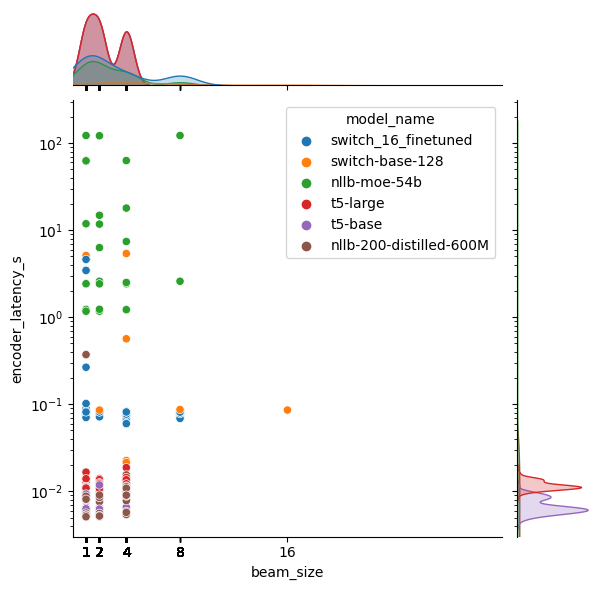

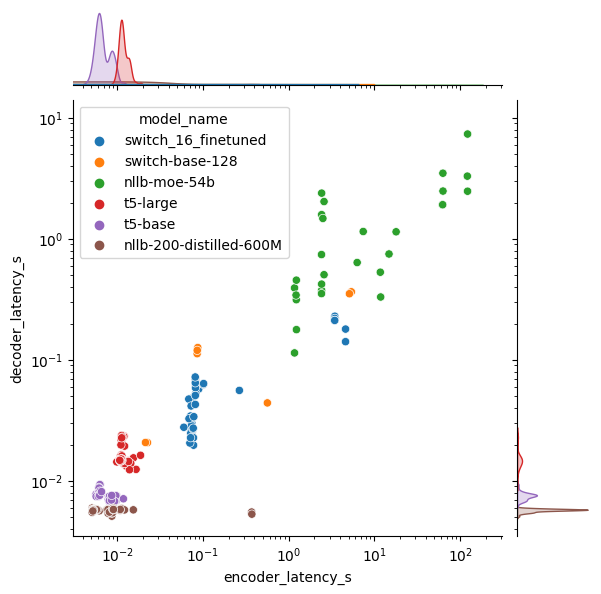

In [125]:
# Effect of beam size on latency and throughput
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
import copy
df_merge_all_temp = copy.deepcopy(df_merge_all)
df_merge_all_temp["model_name"] = df_merge_all_temp["model_name"].str.replace("facebook/", "")
df_merge_all_temp["model_name"] = df_merge_all_temp["model_name"].str.replace("google/", "")

g= sns.jointplot(data=df_merge_all_temp, x="beam_size", y="encoder_latency_s", hue="model_name", ax=axes[0,0]);
plt.xticks(df_merge_all["beam_size"])
plt.xticks(df_merge_all["beam_size"])
plt.xlim([0, 32])

g.ax_joint.set_yscale('log')
# g.ax_joint.set_xscale('log')

# g.ax_joint.set_title("Beam size vs Encoder Latency")
# df_merge_all_temp = df_merge_all_temp[df_merge_all_temp["model_name"] != "nllb-moe-54b"]

g= sns.jointplot(data=df_merge_all_temp, x="encoder_latency_s", y="decoder_latency_s", hue="model_name", ax=axes[0,0]);
# plt.xticks(df_merge_all["beam_size"])
# plt.xticks(df_merge_all["beam_size"])
# plt.xlim([0, 32])
g.ax_joint.set_yscale('log')
g.ax_joint.set_xscale('log')



In [126]:
g = sns.catplot(x="Cholesterol", y="HeartDisease", row="ChestPainType",
                kind="box", orient="h", height=1.5, aspect=4,
                data=heart.query("Cholesterol > 0"))
g.set(xscale="log");

NameError: name 'heart' is not defined

/tmp/ipykernel_4099271/1502881238.py:10: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  g= sns.jointplot(data=df_merge_all_temp, x="beam_size", y="sacrebleu", hue="model_name", ax=axes[0,0]);


(0.0, 16.0)

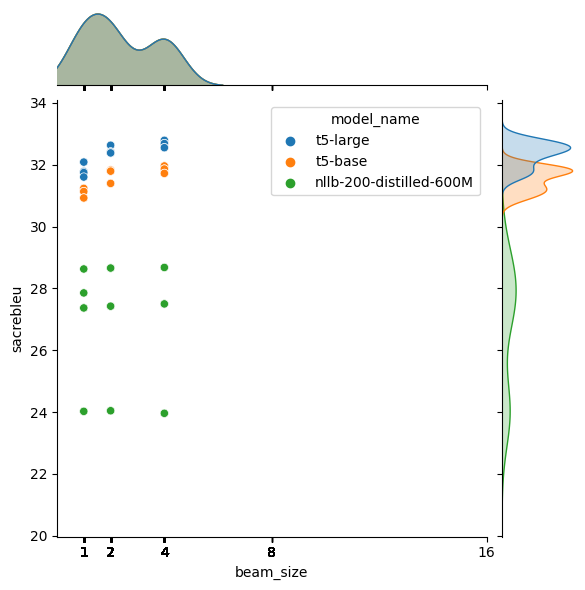

In [140]:
# Effect of beam size on accuracy
# Effect of beam size on latency and throughput
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
import copy
df_merge_all_temp = copy.deepcopy(df_merge_wmt14_multiple_sentences)
df_merge_all_temp["model_name"] = df_merge_all_temp["model_name"].str.replace("facebook/", "")
df_merge_all_temp["model_name"] = df_merge_all_temp["model_name"].str.replace("google/", "")
df_merge_all_temp = df_merge_all_temp[df_merge_all_temp["model_name"].isin(["t5-large","t5-base", "nllb-200-distilled-600M"])]

g= sns.jointplot(data=df_merge_all_temp, x="beam_size", y="sacrebleu", hue="model_name", ax=axes[0,0]);
plt.xticks(df_merge_all["beam_size"])
plt.xticks(df_merge_all["beam_size"])
plt.xlim([0, 16])

# g.ax_joint.set_yscale('log')
# g.ax_joint.set_xscale('log')


# Input Sequence Length

## Extra


In [48]:


# # Create subplots for different metrics
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# # Plot 1: sacrebleu vs beam_size
# data.plot(x='beam_size', y='sacrebleu', kind='bar', ax=axes[0, 0], title='sacrebleu vs beam_size')
# axes[0, 0].set_xlabel('Beam Size')
# axes[0, 0].set_ylabel('sacrebleu')

# # Plot 2: spBleu vs beam_size
# data.plot(x='beam_size', y='spBleu', kind='line', ax=axes[0, 1], title='spBleu vs beam_size')
# axes[0, 1].set_xlabel('Beam Size')
# axes[0, 1].set_ylabel('spBleu')

# # Plot 3: chrf vs beam_size
# data.plot(x='beam_size', y='chrf', kind='line', ax=axes[1, 0], title='chrf vs beam_size')
# axes[1, 0].set_xlabel('Beam Size')
# axes[1, 0].set_ylabel('chrf')

# # Plot 4: chrfpp vs beam_size
# data.plot(x='beam_size', y='chrfpp', kind='line', ax=axes[1, 1], title='chrfpp vs beam_size')
# axes[1, 1].set_xlabel('Beam Size')
# axes[1, 1].set_ylabel('chrfpp')

# # Adjust layout
# plt.tight_layout()

# # Show the plots
# plt.show()

# Calculate mean and standard deviation of each metric
metrics = ['sacrebleu', 'spBleu', 'chrf', 'chrfpp', 'meteor']
for metric in metrics:
    mean = data[metric].mean()
    std = data[metric].std()
    print(f"Metric: {metric}\nMean: {mean:.2f}\nStandard Deviation: {std:.2f}\n")

Metric: sacrebleu
Mean: 34.64
Standard Deviation: 9.18

Metric: spBleu
Mean: 37.82
Standard Deviation: 6.94

Metric: chrf
Mean: 65.30
Standard Deviation: 3.49

Metric: chrfpp
Mean: 62.60
Standard Deviation: 4.52

Metric: meteor
Mean: 0.64
Standard Deviation: 0.09



In [49]:
# Find the row with the highest value for each metric
best_hyperparameters = {}
for metric in metrics:
    best_row = data[data[metric] == data[metric].max()]  # Assumes higher value is better
    best_hyperparameters[metric] = best_row.iloc[0]

# Display the best hyperparameters for each metric
for metric, best_row in best_hyperparameters.items():
    print(f"Best hyperparameters for {metric}:")
    print(best_row)
    print("\n")

Best hyperparameters for sacrebleu:
model_name                                 facebook/nllb-200-distilled-600M
total_params                                                      615073792
dataset_name                                                      flores200
dataset_size                                                            997
dataset_size_after_filter_wrt_input_len                                 997
src_lang                                                                 en
tgt_lang                                                                 fr
batch_size                                                               32
beam_size                                                                 4
max_gen_length                                                          128
max_input_seq_length                                                     -1
tokenizer_padding_setting                                 pad_to_max_length
sacrebleu                                           

[0.01666667 0.03333333 0.05       0.06666667 0.08333333 0.1
 0.11666667 0.13333333 0.15       0.16666667 0.18333333 0.2
 0.21666667 0.23333333 0.25       0.26666667 0.28333333 0.3
 0.31666667 0.33333333 0.35       0.36666667 0.38333333 0.4
 0.41666667 0.43333333 0.45       0.46666667 0.48333333 0.5
 0.51666667 0.53333333 0.55       0.56666667 0.58333333 0.6
 0.61666667 0.63333333 0.65       0.66666667 0.68333333 0.7
 0.71666667 0.73333333 0.75       0.76666667 0.78333333 0.8
 0.81666667 0.83333333 0.85       0.86666667 0.88333333 0.9
 0.91666667 0.93333333 0.95       0.96666667 0.98333333 1.        ]


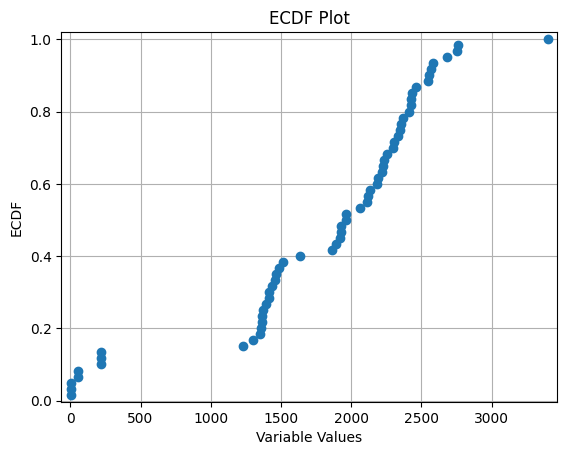

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data

# Calculate the ECDF
x = np.sort(df_merge_wmt14_single_sentence["encoder_throughput"])
y = np.arange(1, len(x) + 1) / len(x)
print(y)
# Create the ECDF plot
plt.plot(x, y, marker='o', linestyle='none')
plt.xlabel('Variable Values')
plt.ylabel('ECDF')
plt.title('ECDF Plot')
plt.margins(0.02)  # Add a small margin around the plot
plt.grid(True)
plt.show()

hello


In [ ]:
0.1 errors out. for nllb-moe device memory ratio
